<a href="https://colab.research.google.com/github/tavares51/VisualizacaoDeDados/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final

Utilizar Dataset Blackfriday.csv

Sugestão de roteiro:

Exame gráfico dos dados

- Resumo/comportamento dos valores (linha(s), setores, barra(s), diagrama de dispersão)

- Distribuição dos valores (histograma, diagrama de caixa)

- Relações entre as variáveis (mapa de calor, diagrama de dispersão)

Pelo menos três análises da distribuição por grupos/recortes (exemplo: como ficam os histogramas de idade por categoria de produtos?)

Conclusão: Hipóteses e observações



Critérios de avaliação do trabalho

- Sequência lógica da apresentação

- Coerência dos gráficos com as variáveis/objetivos

- Apresentação das informações a respeito da distribuição de variáveis importantes

- Ergonomia

## Importando do dados

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bf = pd.read_csv('https://raw.githubusercontent.com/tavares51/VisualizacaoDeDados/main/BlackFriday.csv')

In [7]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
bf.shape

(537577, 12)

# 1 - Exame gráfico dos dados

## Resumo/comportamento dos valores (linha(s), setores, barra(s), diagrama de dispersão)

#### Contagem de Gênero - **Gráfico de Barras:**

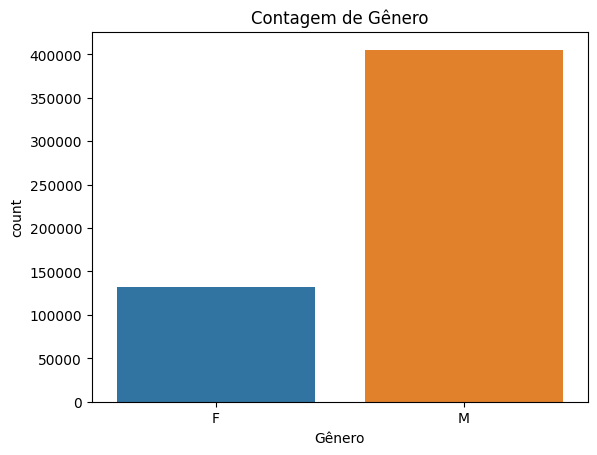

In [9]:
sns.countplot(x="Gender", data=bf)
plt.title("Contagem de Gênero")
plt.xlabel("Gênero")
plt.show()

#### Produtos mais vendidos da Categoria 1

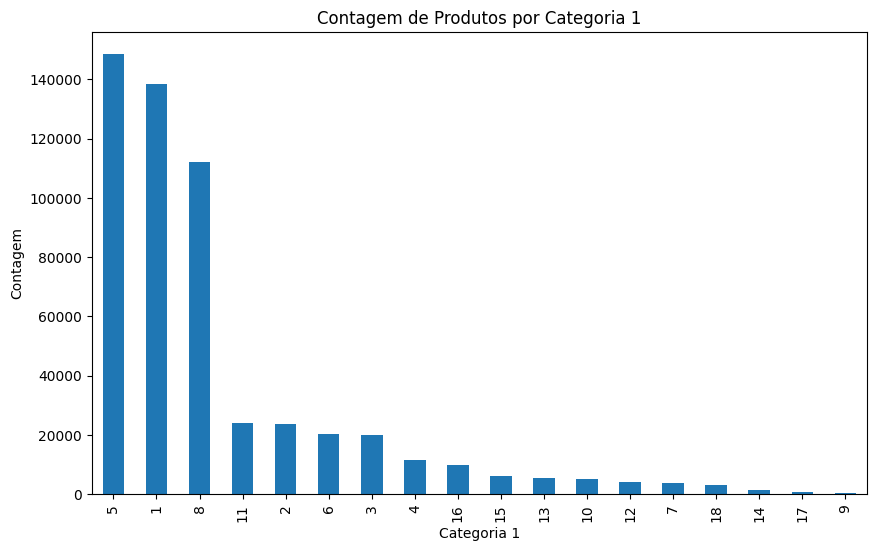

In [10]:
product_category_counts = bf['Product_Category_1'].value_counts()
plt.figure(figsize=(10, 6))
product_category_counts.plot(kind='bar')
plt.title('Contagem de Produtos por Categoria 1')
plt.xlabel('Categoria 1')
plt.ylabel('Contagem')
plt.show()

#### Idade dos Usuários - Gráfico de Barras:

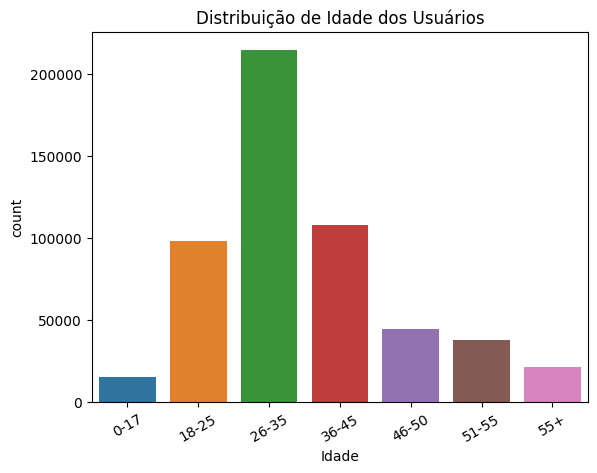

In [11]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.countplot(x="Age", data=bf, order=age_order)
plt.title("Distribuição de Idade dos Usuários")
plt.xticks(rotation=30)
plt.xlabel("Idade")
plt.show()

#### Contagem de Usuários por Estado Civil - Gráfico de Barras:


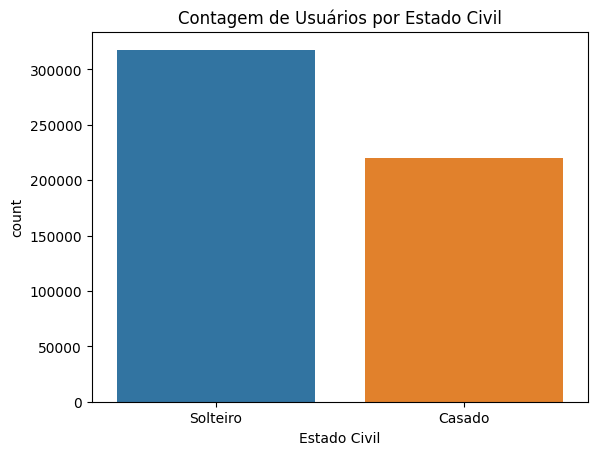

In [12]:
sns.countplot(x="Marital_Status", data=bf)
plt.title("Contagem de Usuários por Estado Civil")
plt.xticks([0, 1], ["Solteiro", "Casado"])
plt.xlabel("Estado Civil")
plt.show()

#### Distribuição de Compras por Categoria de Cidade - Gráfico de Setor

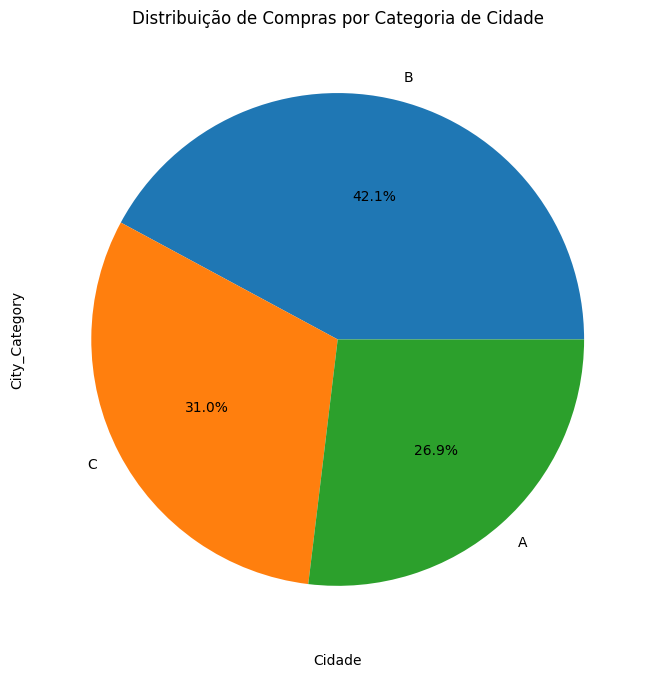

In [13]:
plt.figure(figsize=(8, 8))
bf.City_Category.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribuição de Compras por Categoria de Cidade")
plt.xlabel("Cidade")
plt.show()

## Distribuição dos valores (histograma, diagrama de caixa)

#### Distribuição de Compras - **Histograma**:


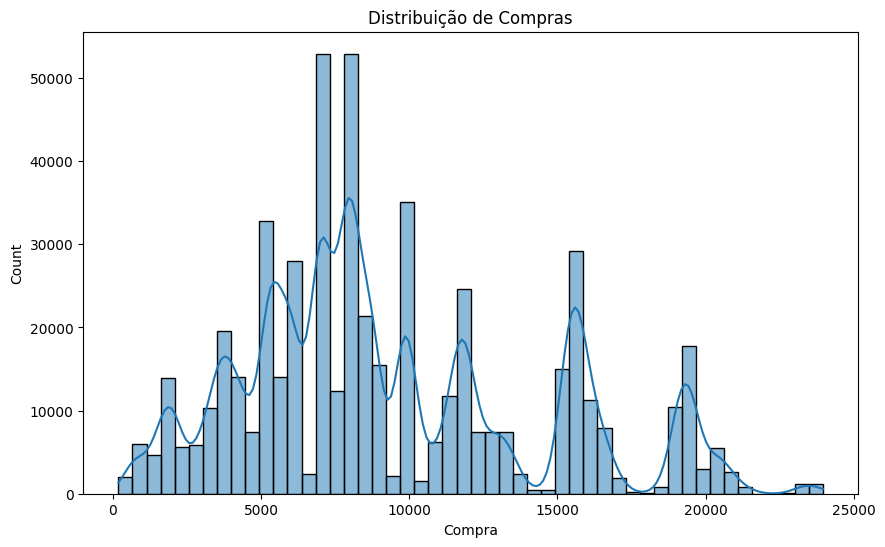

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(bf["Purchase"], kde=True, bins=50)
plt.title("Distribuição de Compras")
plt.xlabel("Compra")
plt.show()

#### Diagrama de Caixa para Compras por Gênero:


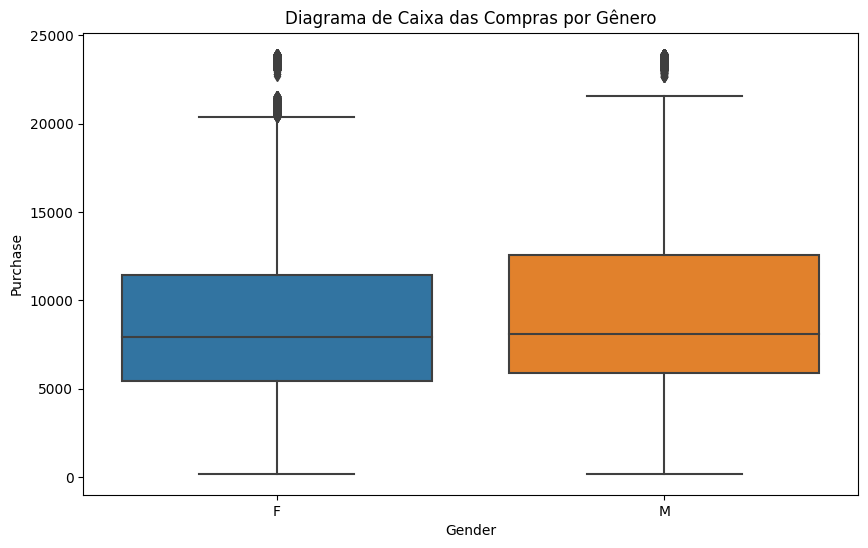

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Purchase", data=bf)
plt.title("Diagrama de Caixa das Compras por Gênero")
plt.show()

#### Diagrama de Caixa de Compras por Idade:


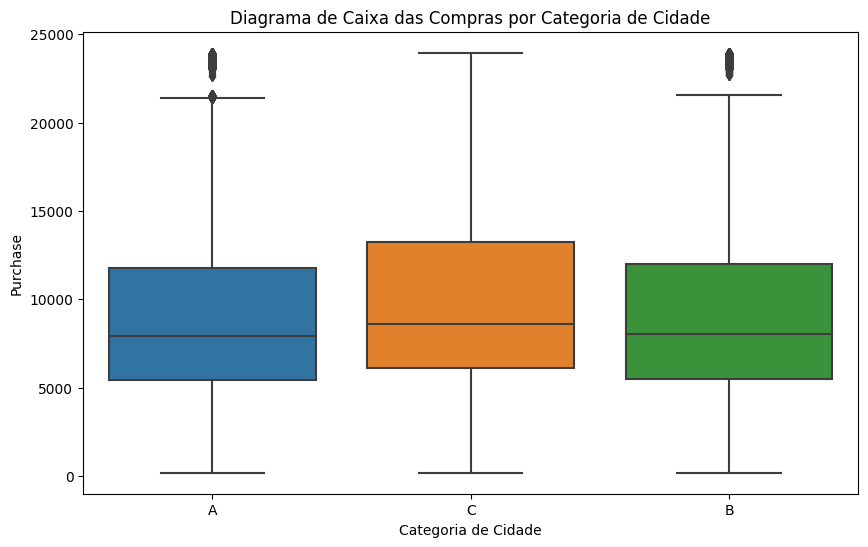

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="City_Category", y="Purchase", data=bf)
plt.title("Diagrama de Caixa das Compras por Categoria de Cidade")
plt.xlabel("Categoria de Cidade")
plt.show()

#### Distribuição de Compras por Categoria de Produtos (Produto 2):

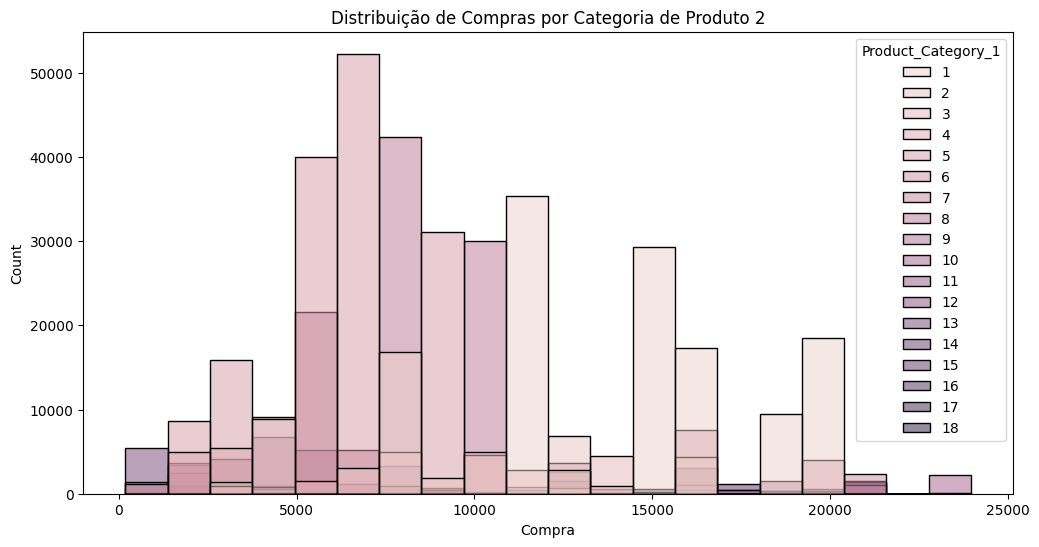

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data=bf, x="Purchase", hue="Product_Category_1", kde=False, common_norm=False, bins = 20)
plt.title("Distribuição de Compras por Categoria de Produto 2")
plt.xlabel("Compra")
plt.show()

#### Distribuição de Compras por Gênero:

Text(0.5, 0, 'Compra')

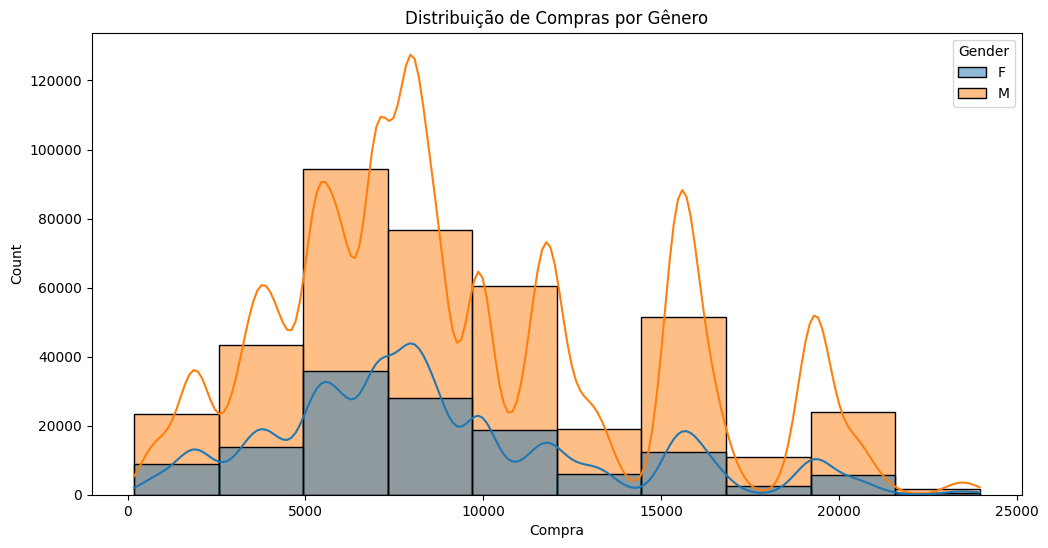

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=bf, x="Purchase", hue="Gender", kde=True, bins=10)
plt.title("Distribuição de Compras por Gênero")
plt.xlabel("Compra")

#### Distribuição de Compras por Estado Civil:

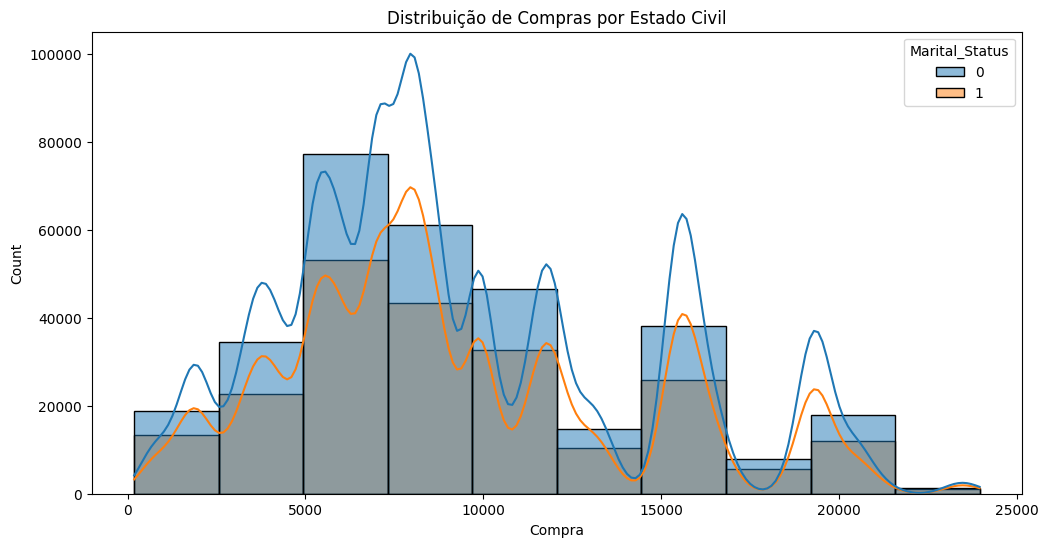

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data=bf, x="Purchase", hue="Marital_Status", kde=True, bins = 10)
plt.title("Distribuição de Compras por Estado Civil")
plt.xlabel("Compra")
plt.show()

## Relações entre as variáveis (mapa de calor, diagrama de dispersão)

#### Mapa de Calor de Correlação entre Variáveis Numéricas:

<ipython-input-20-2fa3f6c55958>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bf.corr()


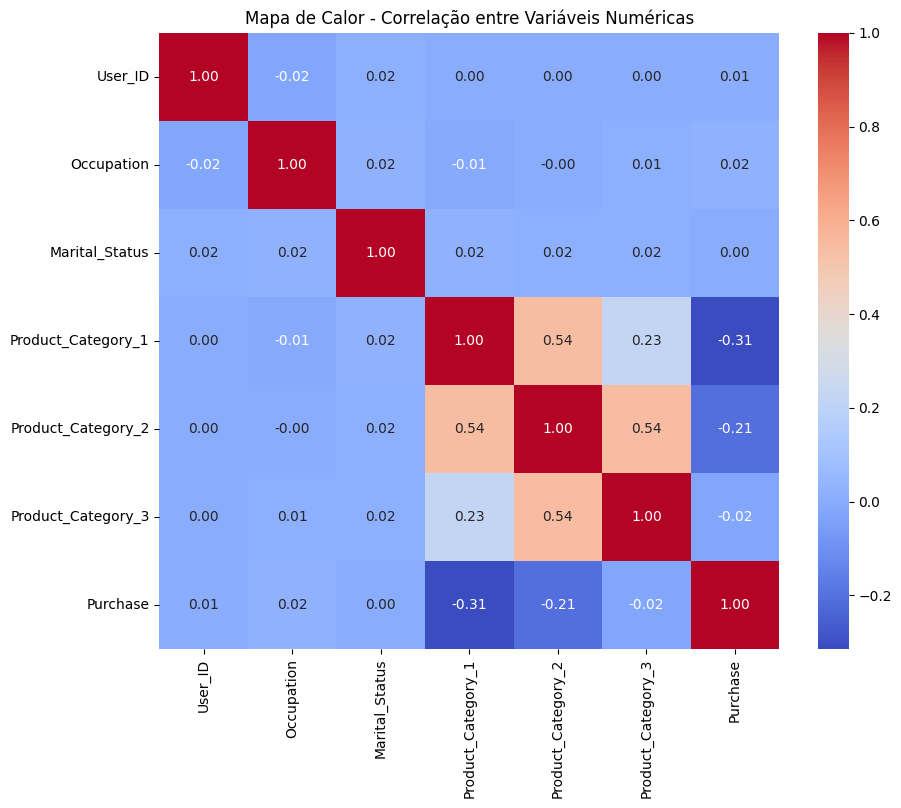

In [20]:
correlation_matrix = bf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor - Correlação entre Variáveis Numéricas")
plt.show()

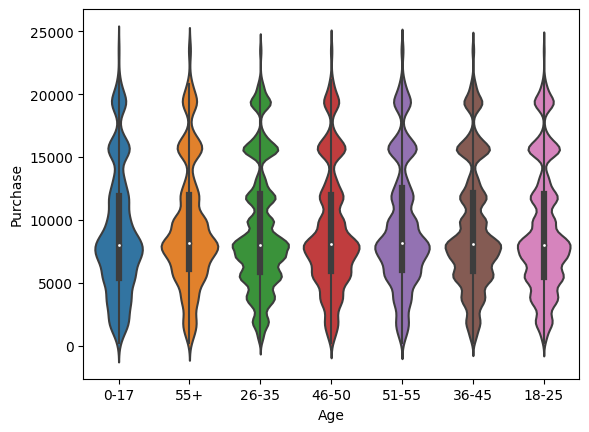

In [21]:
def plot_violin(data_frame, x_column, y_column):
    # Crie o gráfico de violino
    sns.violinplot(x=x_column, y=y_column, data=data_frame)

    # Adicione rótulos aos eixos
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    # Mostre o gráfico
    plt.show()

plot_violin(bf, 'Age', 'Purchase')

# 2 - Conclusão: Hipóteses e observações


Claro, aqui estão mais opções de conclusões e observações com base nas análises do conjunto de dados "Black Friday":

**Conclusões:**

1. **Distribuição por Idade e Gênero**: A análise revela que a maioria dos compradores está na faixa etária de 26-35 anos, e a maior parte deles é do gênero masculino (M). Isso pode indicar um foco específico do mercado-alvo para a Black Friday.

2. **Categoria de Cidade e Compras**: A categoria de cidade "B" apresenta a maior concentração de compras, sugerindo que as áreas urbanas maiores podem ser onde a Black Friday é mais popular. As cidades da categoria "A" têm uma participação menor nas compras.

3. **Compras por Categoria de Produto (Produto 1)**: Observamos que as categorias de produtos 5 e 1 foram as mais compradas. Isso pode ser usado para planejar futuras promoções e ofertas com base nas preferências dos clientes.


**Observações:**

1. **Dados de Produtos Faltantes**: Há uma falta de informações detalhadas sobre os produtos comprados, o que limita a análise das preferências dos clientes em relação a categorias de produtos específicas.

2. **Análise de Gênero**: Embora saibamos que a maioria dos compradores são do gênero masculino, uma análise mais detalhada da relação entre gênero e compras pode fornecer insights mais profundos.

3. **Potencial para Segmentação de Mercado**: Com base nas análises, é possível identificar segmentos de mercado específicos que respondem melhor às promoções da Black Friday. Essa segmentação pode ser útil para estratégias de marketing futuras.

4. **Comportamento ao Longo dos Anos**: Não temos informações sobre como o comportamento de compra na Black Friday mudou ao longo dos anos. Seria interessante entender se houve tendências ao longo do tempo.

5. **Falta de Dados Demográficos**: Dados demográficos mais detalhados, como renda e localização  dos compradores ou descrições de produtos, podem ajudar a compreender melhor o comportamento de compra.

Essas conclusões e observações fornecem uma visão geral do conjunto de dados "Black Friday" e destacam áreas para futuras investigações e análises mais detalhadas.